In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
%matplotlib inline

In [4]:
data = pd.read_csv('final_data.csv')

In [5]:
data.dropna(inplace=True)

In [6]:
posi_data = data[data['Score'] == 'positive'].sample(1500)
negi_data = data[data['Score'] == 'negative'].sample(1500)

In [7]:
reduced_data = pd.concat([posi_data, negi_data],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
reduced_data['Score'].value_counts()

negative    1500
positive    1500
Name: Score, dtype: int64

In [8]:
reduced_data.sort_values(by='Time', axis=0,inplace=True)

In [9]:
reduced_data.reset_index(inplace=True, drop=True)

In [10]:
reduced_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,241479,B0001E5CJO,A3KZ5XRURPTK8A,Scooze,6,17,negative,1109116800,Are You Kidding Me??,I just finished watching this train wreck and ...,finish watch train wreck warn anyon consid buy...
1,319504,B0007LXU9A,A1OJA99YT911TA,"Julien R. Fielding ""Bodhi Grrl!""",12,12,positive,1127088000,I love these bars,"If you are on Weight Watchers, there is no bet...",weight watcher better snack bar eat breakfast ...
2,451583,B000E4AEOO,A38PUAMKVKDO88,"Jasmine Miller ""Jasmine Miller""",0,1,negative,1139875200,Celiac CAUTION: Contains Barley Malt,"When first diagnosed with IBS, I bought this t...",first diagnos ib bought tea sooth digest conta...
3,14277,B000Z94AGQ,ACW2VAH8T3E08,Cynthia Welti Jones,0,0,positive,1141084800,Celestial Seasonings - Bengal Spice Natural He...,"I love this tea. It is very rich in taste, sm...",love tea rich tast smell wonder leav funni tas...
4,469194,B000AQFQC6,ACLD6ZHBZC6TP,K. Bowen,3,4,negative,1141171200,thoroughly disgusted,After watching an advertisement for the tofu n...,watch advertis tofu noodl decid tri suppos tas...


In [11]:
# BOW

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
count_vect = CountVectorizer()

In [11]:
final_counts = count_vect.fit_transform(reduced_data['CleanedText'].values)

In [12]:
final_counts.shape

(3000, 7743)

In [13]:
arr_final_counts = (final_counts).toarray()

In [15]:
X = arr_final_counts
y = reduced_data['Score'].values

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# K-NN basic implementation
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_cv)

In [19]:
acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
print(acc)

63.01587301587301


# BOW - 10 fold cross validation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
X_train.shape

(2100, 7743)

In [20]:
neighbours = list(range(1,50,2))
cv_scores = []
# perform 10-fold cross validation
for k in neighbours:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())


In [26]:
optimal_k = neighbours[cv_scores.index(max(cv_scores))]

CV_SCORES:  [0.621005940097983, 0.6390743770239904, 0.6324575549170212, 0.6595668404099435, 0.6571472628145114, 0.6532854216540922, 0.6704467221478945, 0.6685600364547734, 0.6780543992467164, 0.6756644843474475, 0.6804354164169579, 0.6928301257236154, 0.689498941235035, 0.7047328467657727, 0.7023541296152921, 0.7023245749012773, 0.702809879070792, 0.6985717309214441, 0.6985604251905075, 0.6942700676724124, 0.6995468313178466, 0.697612644277648, 0.6999980239266843, 0.704796318672597, 0.702866602093342]


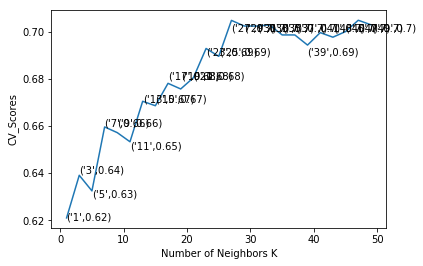

In [34]:
plt.plot(neighbours, cv_scores)
for xy in zip(neighbours,np.round(cv_scores,2)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)

In [36]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 23 is 70.000000%


# BOW - 10 fold cross validation (kd-tree)

In [5]:
posi_data = data[data['Score'] == 'positive'].sample(2000)
negi_data = data[data['Score'] == 'negative'].sample(2000)
reduced_data = pd.concat([posi_data, negi_data],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
print(reduced_data['Score'].value_counts())
reduced_data.sort_values(by='Time', axis=0,inplace=True)
reduced_data.reset_index(inplace=True, drop=True)
reduced_data.head()

positive    2000
negative    2000
Name: Score, dtype: int64


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,374408,B00004CI84,A1GB1Q193DNFGR,Bruce Lee Pullen,5,5,positive,970531200,Fabulous Comedic Fanasy Directed by a Master,Beetlejuice is an awe-inspiring wonderfully am...,beetlejuic wonder amus comed romp explor incre...
1,557949,B0000DJDL4,A1Y20KNCR0SZA1,"Dessartfamily ""grandmasoven""",8,9,positive,1072915200,The best Kringles ever,Others try to make kringles but there is only ...,other tri make kringl one bakeri make real dan...
2,342462,B000084F3O,A3DWUM6SN3N3NR,"Author Brian Wallace (Mind Transmission, Inc.)",4,33,negative,1076457600,the most unnatural odor,I really hate to do this (having been a fan of...,realli hate fan van patten year feel must save...
3,409836,B000PDFEKI,ALY1O3V3SG8HK,"Leslie Wagner ""Lesliepd""",0,0,positive,1103760000,Delicious sauce!,I thought we were doomed to another night of b...,thought doom anoth night bore broil fish boy w...
4,390023,B0002268R0,A2OWD8YTOKT5OM,Sean McGahee,6,6,positive,1103932800,My favorite candy bar ever.,This candy bar is fantastic! I live in the Uni...,candi bar fantast live unit state not realli a...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(reduced_data['CleanedText'].values)
print(final_counts.shape)
arr_final_counts = (final_counts).toarray()

(4000, 8960)


In [7]:
X = arr_final_counts
y = reduced_data['Score'].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
neighbours = list(range(5,40,2))
cv_scores = []
# perform 10-fold cross validation
for k in neighbours:
    knn= KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    print("K: ",k)
    print("Score: ",scores.mean())


K:  5
Score:  0.6739699121526695
K:  7
Score:  0.6893182402107898
K:  9
Score:  0.6875389263347017
K:  11
Score:  0.6832582321567513
K:  13
Score:  0.6889725452037471
K:  15
Score:  0.6835834731857002
K:  17
Score:  0.6825363023945277
K:  19
Score:  0.6871702627402316
K:  21
Score:  0.6850350314235057
K:  23
Score:  0.6893233787602976
K:  25
Score:  0.6925172560510066
K:  27
Score:  0.6903501502387968
K:  29
Score:  0.6853934361407672
K:  31
Score:  0.6835796967162482
K:  33
Score:  0.6835682033116312
K:  35
Score:  0.6839317374674968
K:  37
Score:  0.6821345206662621
K:  39
Score:  0.6835631285384471


In [17]:
optimal_k = neighbours[cv_scores.index(max(cv_scores))]

CV_SCORES:  [0.6739699121526695, 0.6893182402107898, 0.6875389263347017, 0.6832582321567513, 0.6889725452037471, 0.6835834731857002, 0.6825363023945277, 0.6871702627402316, 0.6850350314235057, 0.6893233787602976, 0.6925172560510066, 0.6903501502387968, 0.6853934361407672, 0.6835796967162482, 0.6835682033116312, 0.6839317374674968, 0.6821345206662621, 0.6835631285384471]


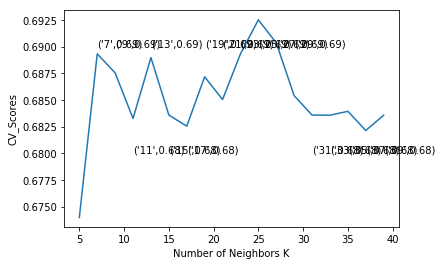

In [18]:
plt.plot(neighbours, cv_scores)
for xy in zip(neighbours,np.round(cv_scores,2)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)

In [20]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 25 is 70.666667%


# TF_IDF - 10 fold cross validation (Brute & Kd-tree)

In [25]:
def posi_negi_encoding(s):
    if s == "positive":
        return 1
    return 0

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(reduced_data['CleanedText'].values)

In [26]:
X = final_tf_idf.toarray()

In [33]:
y = reduced_data['Score'].values

In [38]:
y = list(map(posi_negi_encoding,y))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
neighbours = list(range(1,40,2))
cv_scores = []
# perform 10-fold cross validation
for k in neighbours:
    knn= KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    print("K: ",k)
    print("Score: ",scores.mean())


K:  1
Score:  0.6196350263213999
K:  3
Score:  0.643571569790431
K:  5
Score:  0.6621303979824815
K:  7
Score:  0.683584671269495
K:  9
Score:  0.6924980457112245
K:  11
Score:  0.6964279974416583
K:  13
Score:  0.7092929118993865
K:  15
Score:  0.7103656205527402
K:  17
Score:  0.7128644133580421
K:  19
Score:  0.7239359603712147
K:  21
Score:  0.7375240846730916
K:  23
Score:  0.738234584807022
K:  25
Score:  0.7382320519758816
K:  27
Score:  0.7396580541296991
K:  29
Score:  0.7399960413124803
K:  31
Score:  0.7399909483174893
K:  33
Score:  0.7517666041658695
K:  35
Score:  0.7567730319082058
K:  37
Score:  0.7664159528273865
K:  39
Score:  0.7635626228833094


CV_SCORES:  [0.6196350263213999, 0.643571569790431, 0.6621303979824815, 0.683584671269495, 0.6924980457112245, 0.6964279974416583, 0.7092929118993865, 0.7103656205527402, 0.7128644133580421, 0.7239359603712147, 0.7375240846730916, 0.738234584807022, 0.7382320519758816, 0.7396580541296991, 0.7399960413124803, 0.7399909483174893, 0.7517666041658695, 0.7567730319082058, 0.7664159528273865, 0.7635626228833094]
Optimal k:  37


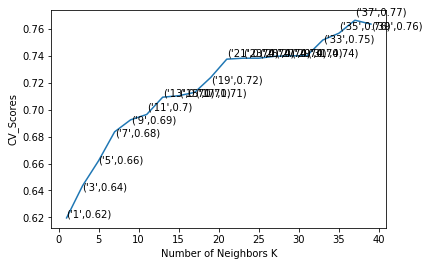

In [45]:
optimal_k = neighbours[cv_scores.index(max(cv_scores))]
plt.plot(neighbours, cv_scores)
for xy in zip(neighbours,np.round(cv_scores,2)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)
print("Optimal k: ", optimal_k)

In [46]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
# BRUTE FORCE
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 37 is 77.000000%


In [47]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
# Kd_tree
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 37 is 77.000000%


Observation: As the dimensionality of our input matrix is quite high, the kd tree algorithm took lot more time as compared to brute force algorithm

# Average Word 2 Vec

In [13]:
from gensim.models import Word2Vec

In [14]:
list_of_sent = []
for sentence in data['CleanedText']:
  try:
    list_of_sent.append(sentence.split())
  except:
    print(sentence)
len(list_of_sent)

364156

In [15]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [17]:
w2v_words = list(w2v_model.wv.vocab)

In [18]:
import pickle

In [19]:
pickle.dump(w2v_model, open('word2vec_model.sav', 'wb'))

In [20]:
"""loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)"""

"loaded_model = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, Y_test)\nprint(result)"

In [21]:
len(w2v_words)

21842

In [22]:
reduced_sent_list = []
for sent in reduced_data['CleanedText']:
  reduced_sent_list.append(sent.split())

In [23]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in reduced_sent_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

3000
50


In [28]:
X = sent_vectors

In [29]:
y = reduced_data['Score'].values

In [30]:
y = list(map(posi_negi_encoding,y))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
neighbours = list(range(1,50,2))
cv_scores = []
# perform 10-fold cross validation
for k in neighbours:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    print("K: ",k)
    print("Score: ",scores.mean())

K:  1
Score:  0.7195324588938956
K:  3
Score:  0.7471472088234373
K:  5
Score:  0.7704626819094267
K:  7
Score:  0.7776147175348972
K:  9
Score:  0.7842723352975287
K:  11
Score:  0.7804900229893994
K:  13
Score:  0.7838257211317825
K:  15
Score:  0.7928620560448947
K:  17
Score:  0.7914425119239288
K:  19
Score:  0.7909685566782099
K:  21
Score:  0.7938189074582189
K:  23
Score:  0.7919028614189502
K:  25
Score:  0.7885649496425251
K:  27
Score:  0.7885672280658562
K:  29
Score:  0.7866510524480094
K:  31
Score:  0.7861884677225162
K:  33
Score:  0.7909481372539492
K:  35
Score:  0.7899934994746668
K:  37
Score:  0.790483274105125
K:  39
Score:  0.7861748619718187
K:  41
Score:  0.7880955296470388
K:  43
Score:  0.7837870743208734
K:  45
Score:  0.7832972780939855
K:  47
Score:  0.7880638044918414
K:  49
Score:  0.7904469921032655


CV_SCORES:  [0.7195324588938956, 0.7471472088234373, 0.7704626819094267, 0.7776147175348972, 0.7842723352975287, 0.7804900229893994, 0.7838257211317825, 0.7928620560448947, 0.7914425119239288, 0.7909685566782099, 0.7938189074582189, 0.7919028614189502, 0.7885649496425251, 0.7885672280658562, 0.7866510524480094, 0.7861884677225162, 0.7909481372539492, 0.7899934994746668, 0.790483274105125, 0.7861748619718187, 0.7880955296470388, 0.7837870743208734, 0.7832972780939855, 0.7880638044918414, 0.7904469921032655]
Optimal k:  21


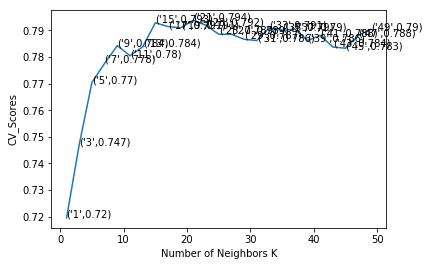

In [40]:
optimal_k = neighbours[cv_scores.index(max(cv_scores))]
plt.plot(neighbours, cv_scores)
for xy in zip(neighbours,np.round(cv_scores,3)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)
print("Optimal k: ", optimal_k)

In [41]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
# Brute Force
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 21 is 79.555556%


In [42]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
# KD_TREE
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 21 is 79.555556%


# tf_idf Word2Vev

In [46]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() 
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in reduced_sent_list: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [47]:
X = tfidf_sent_vectors
y = reduced_data['Score'].values

In [53]:
y = list(map(posi_negi_encoding,y))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
neighbours = list(range(1,50,2))
cv_scores = []
# perform 10-fold cross validation
for k in neighbours:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    print("K: ",k)
    print("Score: ",scores.mean())

K:  1
Score:  0.6728587409929391
K:  3
Score:  0.7076210560870078
K:  5
Score:  0.7218772156587073
K:  7
Score:  0.7228364966703704
K:  9
Score:  0.7218953998524963
K:  11
Score:  0.7209339699960803
K:  13
Score:  0.7371427599589236
K:  15
Score:  0.734734574480147
K:  17
Score:  0.7418774964122932
K:  19
Score:  0.7404466033675312
K:  21
Score:  0.7433197167844212
K:  23
Score:  0.7466462364441909
K:  25
Score:  0.7528254285001603
K:  27
Score:  0.7552200298246693
K:  29
Score:  0.7494851951075449
K:  31
Score:  0.749975034527292
K:  33
Score:  0.7499614287765947
K:  35
Score:  0.7547097709806615
K:  37
Score:  0.7523287970032795
K:  39
Score:  0.7580408906799528
K:  41
Score:  0.762342445946836
K:  43
Score:  0.7575941253391989
K:  45
Score:  0.7566371659437262
K:  47
Score:  0.7604377272349334
K:  49
Score:  0.75424942148564


CV_SCORES:  [0.6728587409929391, 0.7076210560870078, 0.7218772156587073, 0.7228364966703704, 0.7218953998524963, 0.7209339699960803, 0.7371427599589236, 0.734734574480147, 0.7418774964122932, 0.7404466033675312, 0.7433197167844212, 0.7466462364441909, 0.7528254285001603, 0.7552200298246693, 0.7494851951075449, 0.749975034527292, 0.7499614287765947, 0.7547097709806615, 0.7523287970032795, 0.7580408906799528, 0.762342445946836, 0.7575941253391989, 0.7566371659437262, 0.7604377272349334, 0.75424942148564]
Optimal k:  41


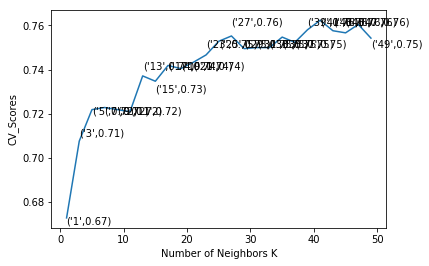

In [58]:
optimal_k = neighbours[cv_scores.index(max(cv_scores))]
plt.plot(neighbours, cv_scores)
for xy in zip(neighbours,np.round(cv_scores,2)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)
print("Optimal k: ", optimal_k)

In [59]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
# Brute Force
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='brute')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 41 is 76.666667%


In [60]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
# kd_tree
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 41 is 76.666667%
